In [1]:
import pyHalo
print(pyHalo.__path__)
from samana.forward_model_dual import forward_model
from samana.Data.wgdj0405 import WGDJ0405_JWST, WGDJ0405_HST
from samana.Model.wgdj0405_model import WGDJ0405ModelEPLM3M4Shear
import pyHalo
print(pyHalo.__path__)
import os
import numpy as np
import pickle

['/Users/ryankeeley/opt/anaconda3/envs/samana_env/lib/python3.10/site-packages/pyhalo-1.2.1-py3.10.egg/pyHalo']
['/Users/ryankeeley/opt/anaconda3/envs/samana_env/lib/python3.10/site-packages/pyhalo-1.2.1-py3.10.egg/pyHalo']


### Modeling of the lens system WGDJ 0405 with JWST flux ratio measurements presented by Nierenberg et al. (2023) and HST imaging data of the lensed arcs in 814W

In [5]:
data_class = WGDJ0405_JWST()
model = WGDJ0405ModelEPLM3M4Shear
preset_model_name = 'WDM'
kwargs_sample_realization = {'log10_sigma_sub': ['UNIFORM', -1.5, -1.49], 
                            'log_mc': ['UNIFORM', 4.0, 4.1]}

kwargs_sample_source = {'source_size_pc': ['UNIFORM', 1, 10],'source_size_pc_2': ['UNIFORM', 40, 80]}
kwargs_sample_macro_fixed = {
    'a4_a': ['GAUSSIAN', 0.0, 0.01], 
    'a3_a': ['GAUSSIAN', 0.0, 0.005],
    'delta_phi_m3': ['GAUSSIAN', -np.pi/6, np.pi/6],
    'delta_phi_m4': ['GAUSSIAN', -np.pi/8, np.pi/8]
}

output_path = os.getcwd() + '/example_model_0405/'
job_index = 1
n_keep = 2
tolerance = np.inf

reading output to files: 
/Users/ryankeeley/samana/notebooks/example_model_0405/job_1/parameters.txt
/Users/ryankeeley/samana/notebooks/example_model_0405/job_1/fluxes.txt
starting with 0 samples accepted, 2 remain
existing magnifications:  None
samples remaining:  2
running simulation with a summary statistic tolerance of:  inf
random seed:  2993827871
SOURCE PARAMETERS: 
{'source_size_pc': 4.484489705469915, 'source_size_pc_2': 44.46065282864308}
REALIZATION PARAMETERS: 
{'log10_sigma_sub': -1.4924978651847478, 'log_mc': 4.0193040636457065}
FIXED MACROMODEL SAMPLES: 
{'a4_a': -0.001239783392184636, 'a3_a': 0.0073558380833324164, 'delta_phi_m3': -0.3013942616714175, 'delta_phi_m4': -0.720511839140768}
realization has 2724 halos
setting up decoupled multi-plane approximation...
done.
running fitting sequence...
Computing the PSO ...
10
Max iteration reached! Stopping.
-1.4372379419805863 reduced X^2 of best position
-2806.2070817170948 log likelihood
3905 effective number of data point

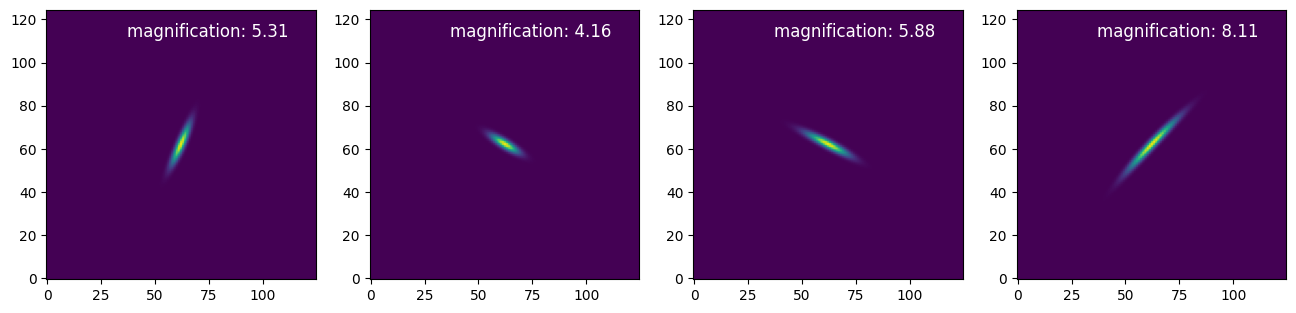

-1.3558569598489487 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.3558569598489485


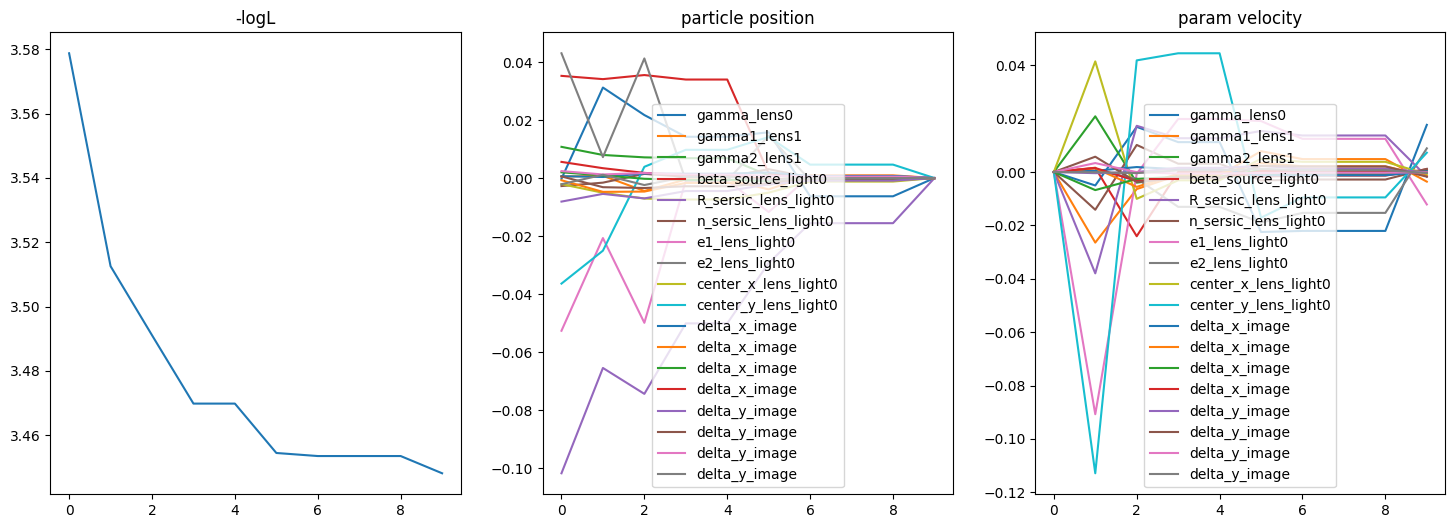

<Figure size 640x480 with 0 Axes>

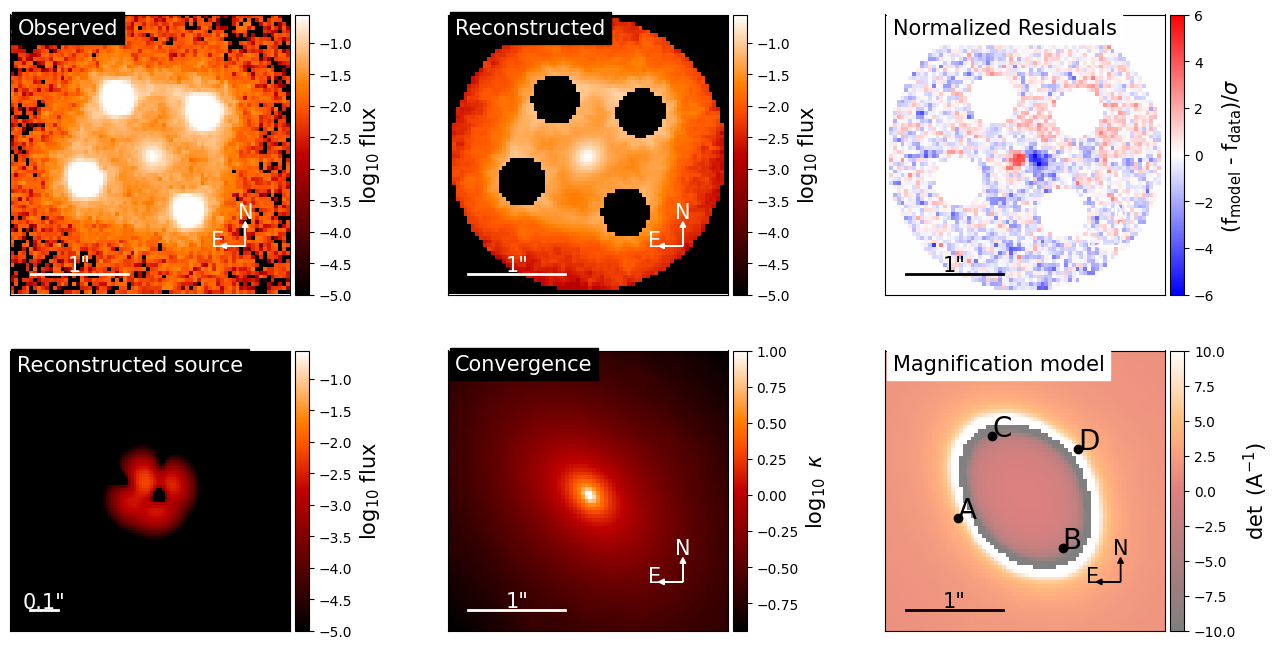

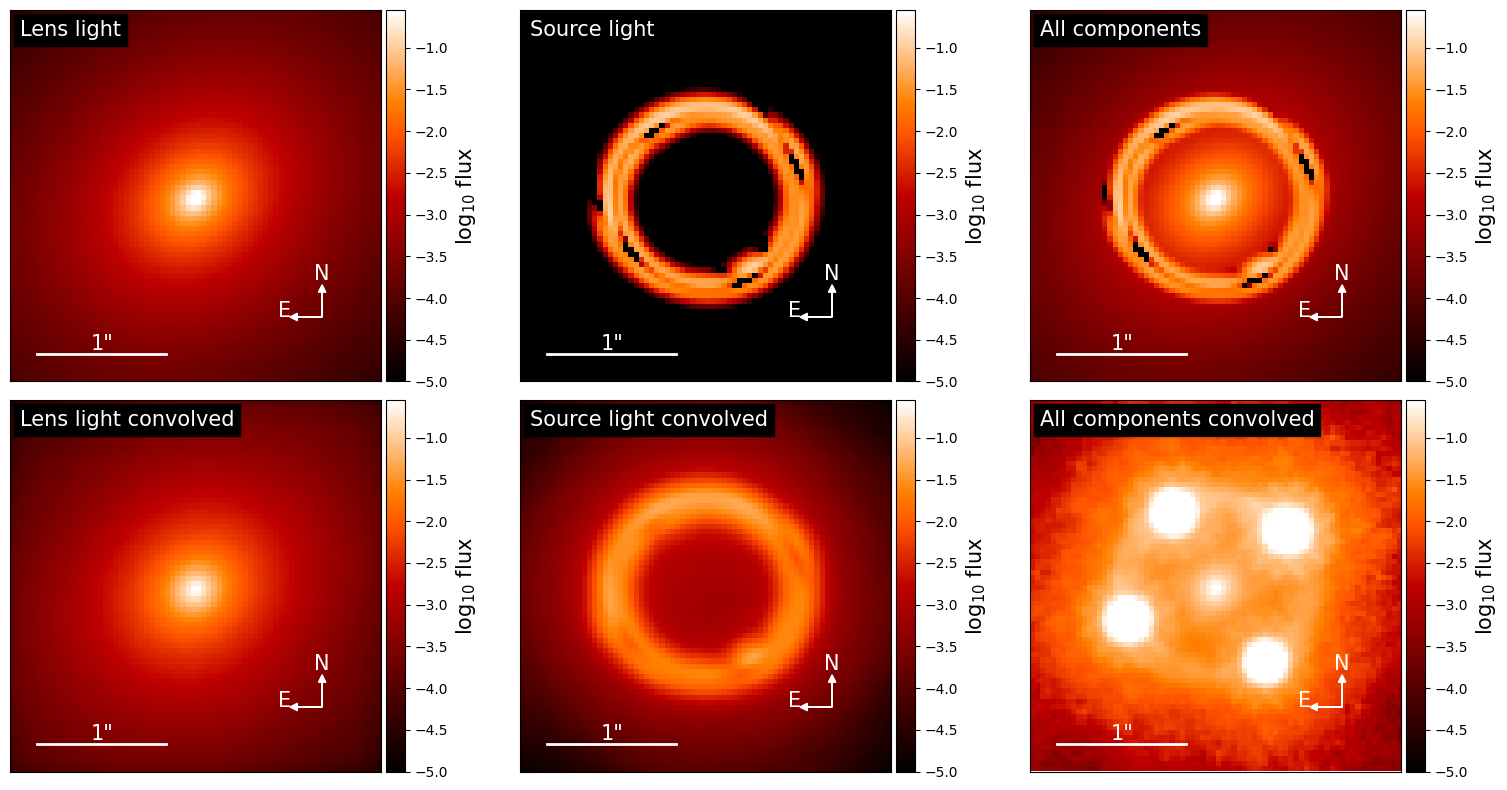

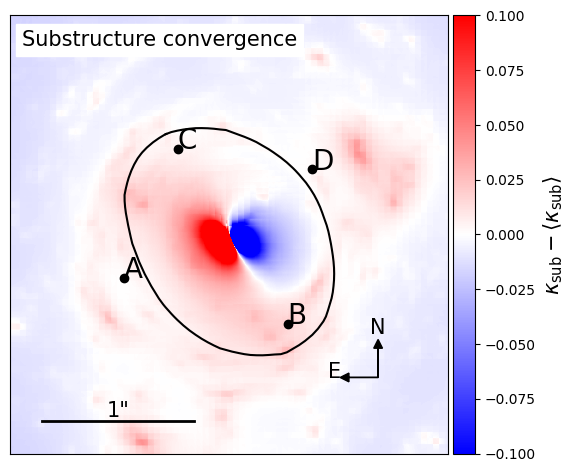

test
N_kept:  1
N remaining:  1
accepted realizations counter:  1
random seed:  2993827872
SOURCE PARAMETERS: 
{'source_size_pc': 2.135081009247968, 'source_size_pc_2': 44.140838937657264}
REALIZATION PARAMETERS: 
{'log10_sigma_sub': -1.4969425725192167, 'log_mc': 4.042863271418618}
FIXED MACROMODEL SAMPLES: 
{'a4_a': 0.003993224886964993, 'a3_a': 0.006007635406983716, 'delta_phi_m3': -0.5496535599898061, 'delta_phi_m4': 0.017643923958233387}
realization has 2667 halos
setting up decoupled multi-plane approximation...
done.
running fitting sequence...
Computing the PSO ...
10
Max iteration reached! Stopping.
-1.3163237771939063 reduced X^2 of best position
-2570.122174971102 log likelihood
3905 effective number of data points
[{'theta_E': 0.711079553593806, 'gamma': 1.885660914348595, 'e1': -0.018353471413626626, 'e2': 0.1411305997547503, 'center_x': 0.003793205099487936, 'center_y': -0.06524090182647671, 'a3_a': 0.006007635406983716, 'delta_phi_m3': -0.5496535599898061, 'a4_a': 0.0039

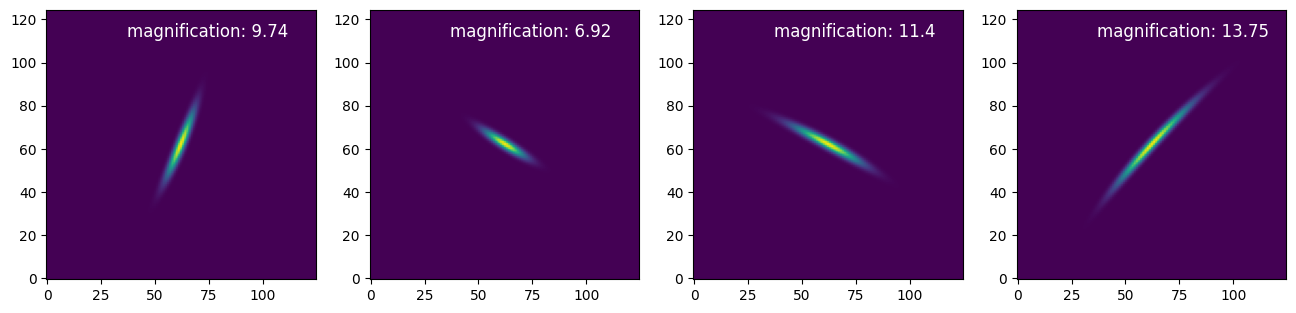

-1.2220950810957574 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.2220950810957565


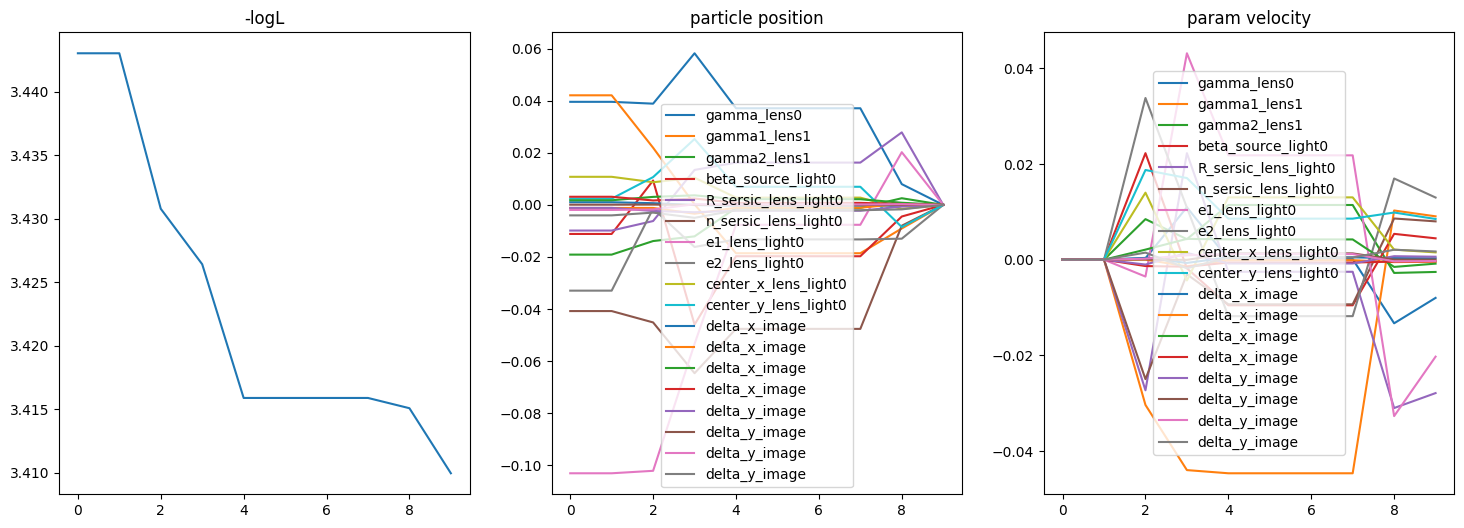

<Figure size 640x480 with 0 Axes>

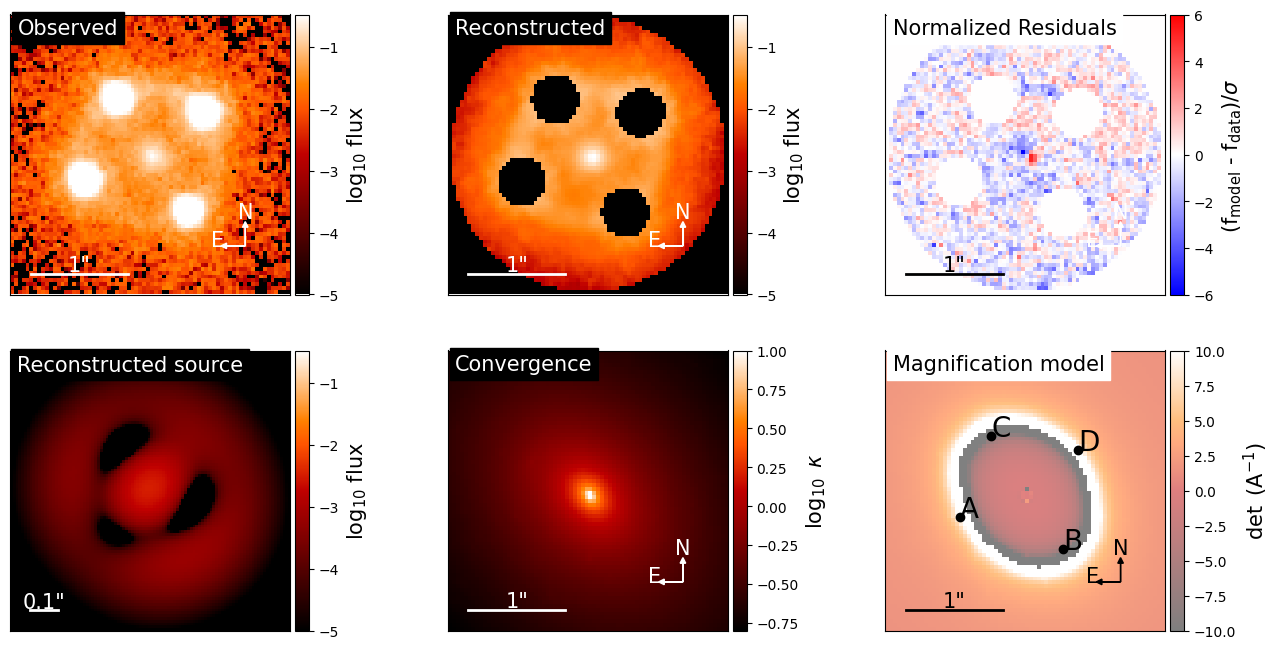

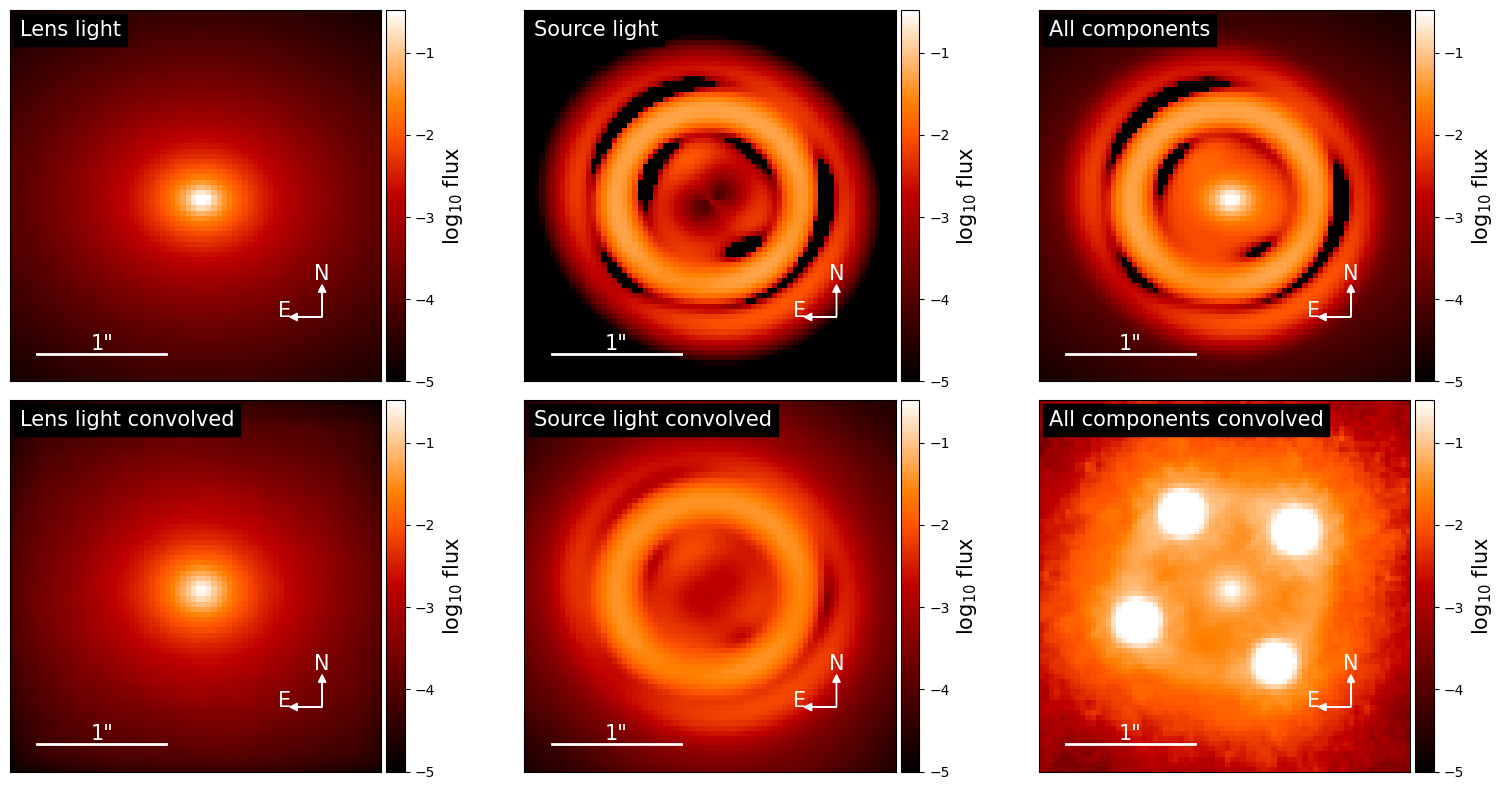

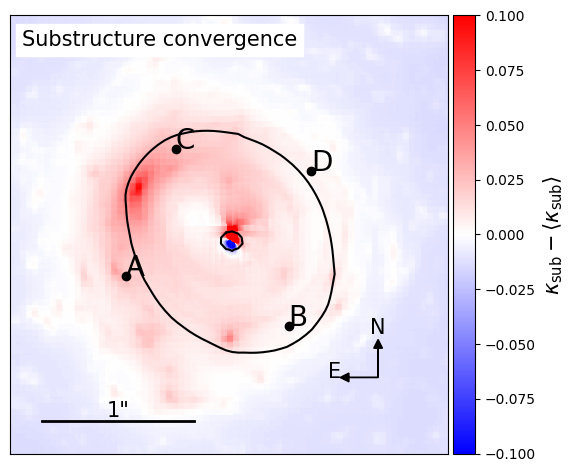

test
N_kept:  2
N remaining:  0
accepted realizations counter:  2
final data readout...
writing parameter output to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/parameters.txt
writing flux ratio output to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/fluxes.txt
writing flux ratio output to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/fluxes2.txt
writing macromodel samples to /Users/ryankeeley/samana/notebooks/example_model_0405/job_1/macromodel_samples.txt

SIMULATION FINISHED


In [6]:
job_index = 1
random_seed_init = None
n_pso_particles = 10
n_pso_iterations = 10
nmax_shapelets = 4
forward_model(output_path, job_index, n_keep, data_class, model, preset_model_name,
                  kwargs_sample_realization, kwargs_sample_source, kwargs_sample_macro_fixed, 
               tolerance, random_seed_init=random_seed_init, 
              verbose=True, n_pso_particles=n_pso_particles, 
              n_max_shapelets=nmax_shapelets,
              n_pso_iterations=n_pso_iterations, num_threads=8, 
              resample_kwargs_lens=False, use_imaging_data=True, test_mode=True)




In [ ]:
forward_model(output_path, job_index, n_keep, data_class, model, preset_model_name,
                  kwargs_sample_realization, kwargs_sample_source, kwargs_sample_macro_fixed,
               tolerance, random_seed_init=random_seed_init,
              rescale_grid_resolution=2.0,
              # rescale_grid_resolution=2 lowers the resolution of the ray-tracing grid, which makes the calcuation
              # faster without a significant loss of precision as far as I can tell
              verbose=verbose, n_pso_particles=n_pso_particles,
              n_pso_iterations=n_pso_iterations, num_threads=num_threads,
              test_mode=test_mode, use_imaging_data=use_imaging_data)